In [198]:
import pandas as pd   # Great for tables (google spreadsheets, microsoft excel, csv). 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from sklearn.linear_model import LinearRegression

from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

import os # Good for navigating your computer's files 
import sys
pd.options.mode.chained_assignment = None #suppress warnings

In [135]:
housing_train = pd.read_csv("california_housing_train.csv")

In [136]:
housing_test = pd.read_csv("california_housing_test.csv")

In [137]:
housing_train.shape

(17000, 9)

In [199]:
housing_test.shape

(3000, 9)

In [139]:
housing_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [140]:
## predict house value using all the other data?
## dytpe = float64

In [141]:
housing_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [196]:
##x_train = housing_train.drop(["median_house_value"], axis=1)
##x_train = housing_train[["housing_median_age", "median_income"]]
x_train = housing_train["median_income"]
y_train = housing_train["median_house_value"]

##x_test = housing_test.drop(["median_house_value"], axis=1)
##x_test = housing_test[["housing_median_age", "median_income"]]
x_test = housing_test["median_income"]
y_test = housing_test["median_house_value"]

x_train.shape

(17000,)

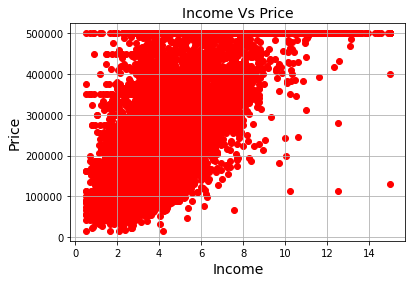

In [184]:
plt.scatter(housing_train['median_income'], housing_train['median_house_value'], color='red')
plt.title('Income Vs Price', fontsize=14)
plt.xlabel('Income', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True)
plt.show()

In [185]:
model = linear_model.LinearRegression()

In [186]:
housing_test.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
median_house_value    False
dtype: bool

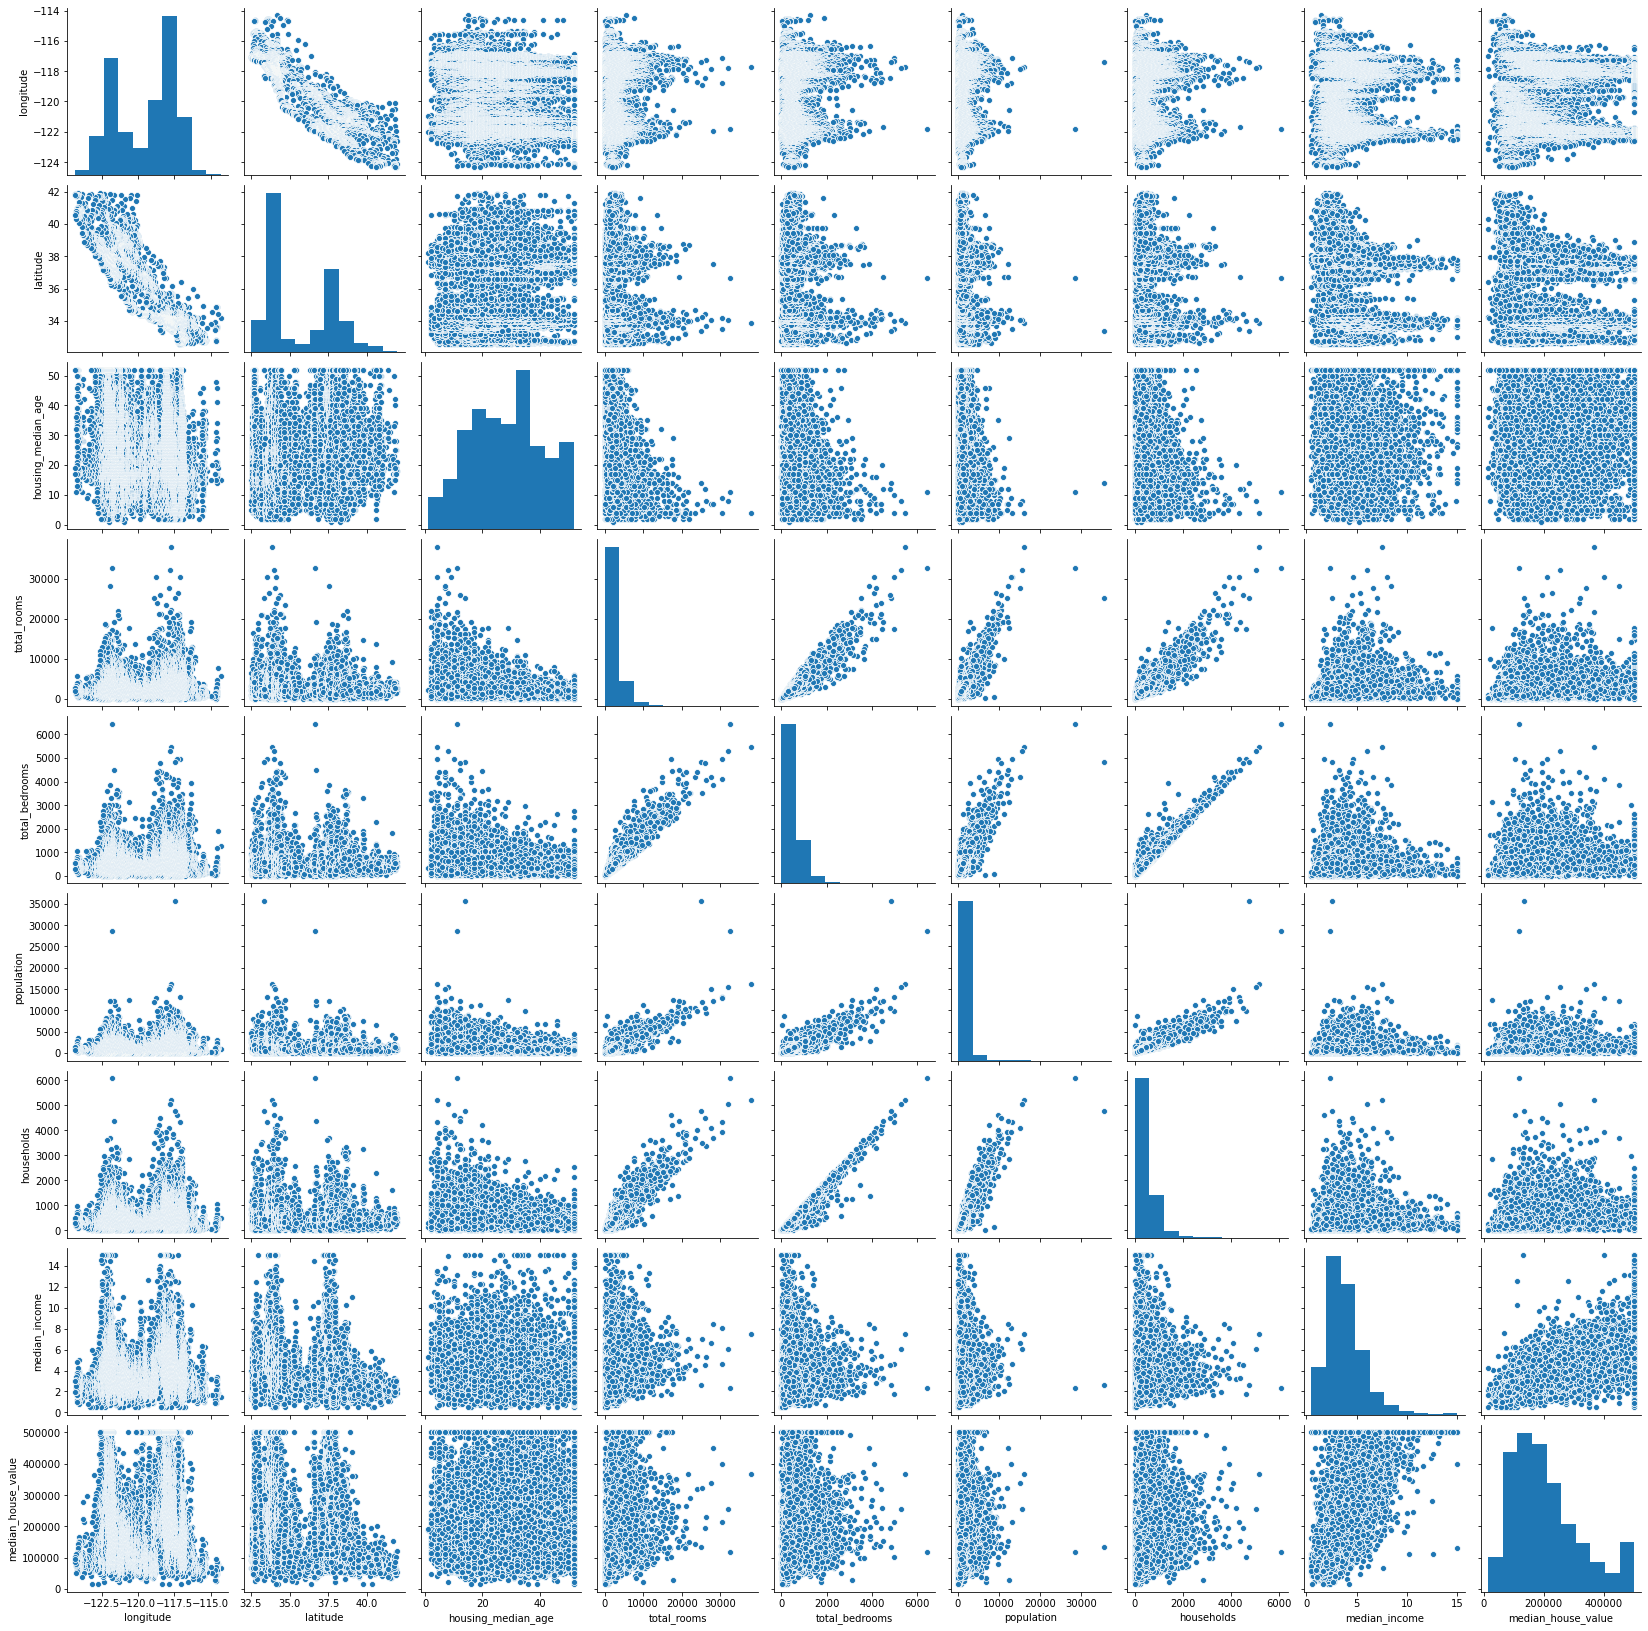

In [105]:
sns.pairplot(data=housing_train)

In [188]:
x_train.shape

(17000, 2)

In [189]:
y_train.shape

(17000,)

In [190]:
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [191]:
print("Coefficients: \n", model.coef_)

Coefficients: 
 [ 1746.30286911 43389.52462688]


In [192]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 6542597407.10
Coefficient of determination: 0.49


In [193]:
model = sm.OLS(y_train, x_train).fit()
predictions = model.predict(x_train) 
 
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:     median_house_value   R-squared (uncentered):                   0.884
Model:                            OLS   Adj. R-squared (uncentered):              0.884
Method:                 Least Squares   F-statistic:                          6.475e+04
Date:                Thu, 29 Sep 2022   Prob (F-statistic):                        0.00
Time:                        09:27:39   Log-Likelihood:                     -2.1624e+05
No. Observations:               17000   AIC:                                  4.325e+05
Df Residuals:                   16998   BIC:                                  4.325e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [123]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

In [28]:
diabetes_X.shape

(442, 10)

In [29]:
diabetes_y.shape

(442,)

In [30]:
diabetes_X = diabetes_X[:, np.newaxis, 2]

In [33]:
diabetes_X.shape

(442, 1)

In [36]:
for i in range(10):
    print(diabetes_X[i])

[0.06169621]
[-0.05147406]
[0.04445121]
[-0.01159501]
[-0.03638469]
[-0.04069594]
[-0.04716281]
[-0.00189471]
[0.06169621]
[0.03906215]


In [37]:
for i in range(10):
    print(diabetes_y[i])

151.0
75.0
141.0
206.0
135.0
97.0
138.0
63.0
110.0
310.0


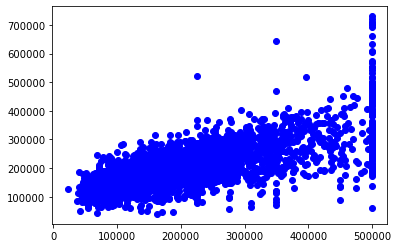

In [194]:
plt.scatter(y_test, y_pred, color="blue")
## plt.plot(x_test, y_pred, color="blue", linewidth=3)